## DBSCAN : density based spatial clustering applications with noise

DBSCAN groups densely grouped datapoints as a cluster and this algorithm is robust to outliers. dbscan is able to cluster in non-linearly separable data

we dont have to specify the number of clusters beforehand as we do in the case of k-means

here, it is assumes that the clusters are areas of high density separated by areas of lower density.

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors

import math

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.neighbors import NearestNeighbors


In [2]:
# creating dataset
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]


# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

C:\Users\RAJESH\AppData\Local\Temp\ipykernel_808\527159775.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(PointsInCircum(300,700))
C:\Users\RAJESH\AppData\Local\Temp\ipykernel_808\527159775.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(PointsInCircum(100,300))
C:\Users\RAJESH\AppData\Local\Temp\ipykernel_808\527159775.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])


In [3]:
df.head()

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181


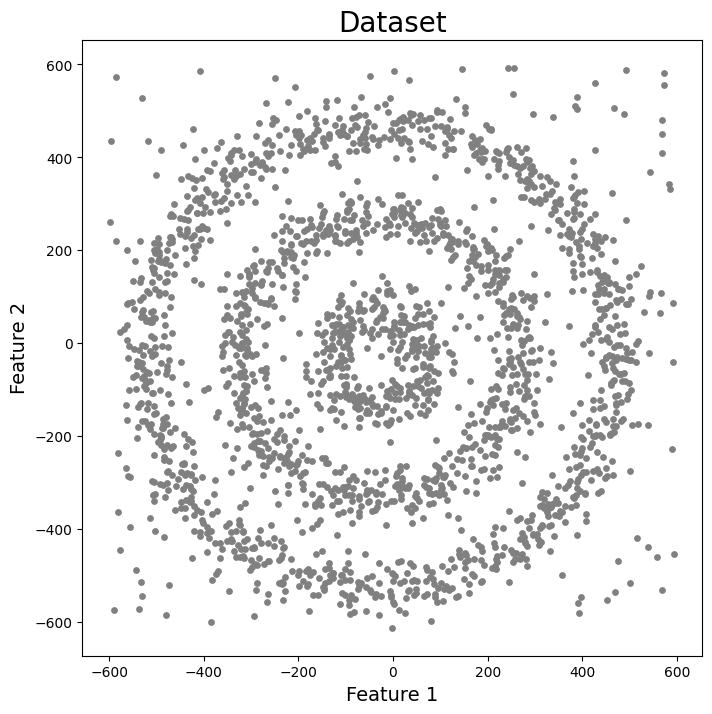

In [4]:
# vlisualising the data

plt.figure(figsize=(8, 8))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [5]:
# k-means clustering on the dataset

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df[[0, 1]])

df['kmeans_labels'] = kmeans.labels_

c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
df.head()

,0,1,kmeans_labels
0,484.891555,-31.006357,0
1,489.391178,21.973916,0
2,462.886575,-27.599889,0
3,517.218479,5.588090,0
4,455.669049,1.982181,0


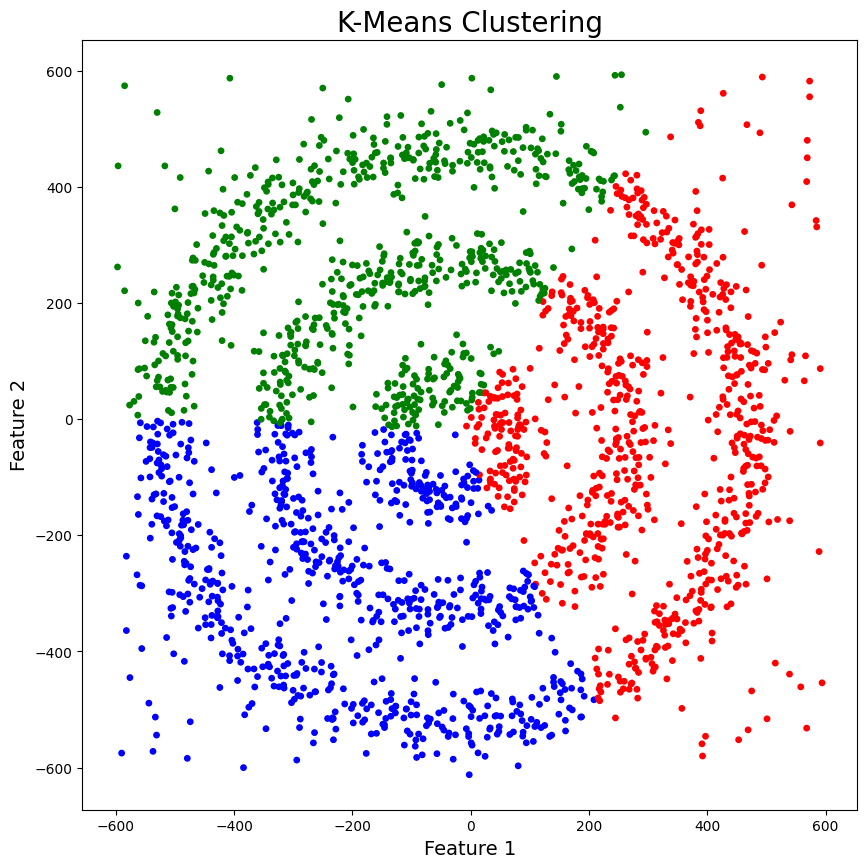

In [7]:
# Plotting resulting kmeans clusters
colors=['red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['kmeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

you can see that kmeans fails to cluster the data properly

In [8]:
# now, we will try hierarchical clustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
cluster.fit(df[[0, 1]])

df['agglo_clustering'] = cluster.labels_

c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [9]:
df.head()

,0,1,kmeans_labels,agglo_clustering
0,484.891555,-31.006357,0,1
1,489.391178,21.973916,0,2
2,462.886575,-27.599889,0,1
3,517.218479,5.588090,0,1
4,455.669049,1.982181,0,2


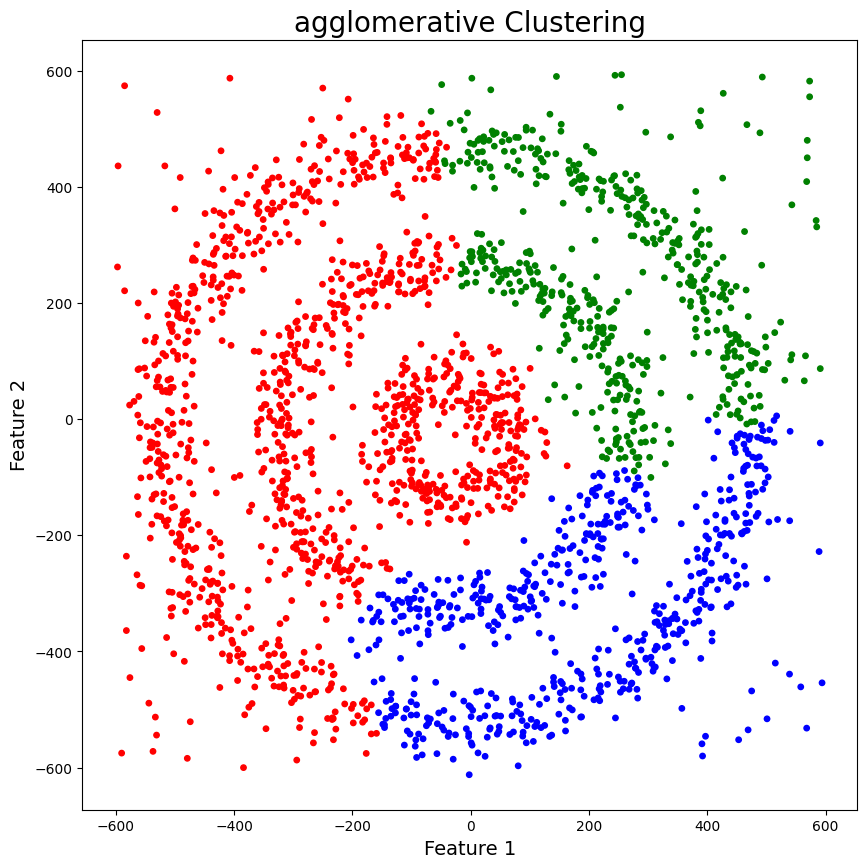

In [10]:
# Plotting resulting clusters
colors=['red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['agglo_clustering'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('agglomerative Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

even, heirarchical clustering faild the task

you can also try with n_clusters = 4 for kmeans and agglomerative clustering. dont forget to add another color in the colors list while plotting

In [11]:
# NOTE : 
# DBSCAN() has 2 main parameters : Epsilon and minPoints

# minPoints : minimum number of datapoints that has to be inside the circle for the datapoint to be considered as core point. 
    # optimal value for 'minPoints' : mainly depends on the domain knowledge but should be always greater than number dimensions+1 [minPoints >= number_of_dimensions + 1]
    # The larger the data set, the larger the value of MinPts should be
    # If the data set is noisier, choose a larger value of MinPts
    # Generally, MinPts should be greater than or equal to the dimensionality of the data set
    # For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).
    # If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).

# Epsilon : radius of circle to the created around each data point to check for density
    # optimal value for Epsilon : decided by the k-distance graph. value where the graph has maximum curvature is selected.
    # if 'Epsilon' value is too small, then higher number of clusters will be created and more data points will be considered as outliers. if 'Epsilon' value is too large, various small clusters will be considered as one big cluster and we will lose details.



In [21]:
minpoints = 2 * 3 #minpoints for dbscan clustering

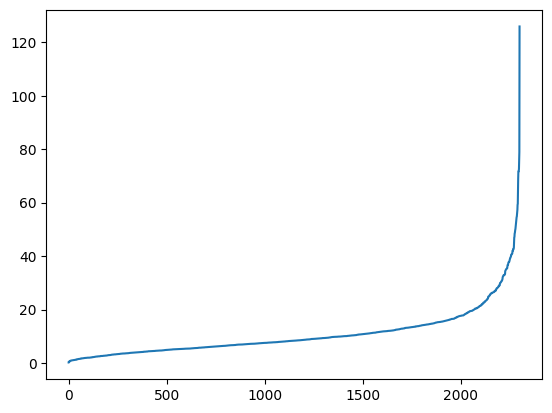

In [22]:
# k-distance graph

neighbors = NearestNeighbors(n_neighbors=minpoints)
neighbors_fit = neighbors.fit(df[[0, 1]])
distances, indices = neighbors_fit.kneighbors(df[[0, 1]])

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

in the above graph, see that point at y-axis where there is maximum curvature is 30, so epsilon = 30 in this case

In [23]:
# now, we will try DBSCAN

dbscan = DBSCAN(eps = 30, min_samples=minpoints)
# NOTE : to find the most accurate values for 'min_samples' and 'eps'(epsilon) parameters, you can try values slightly above and below the claculated values

dbscan.fit(df[[0, 1]])

df['dbscan_labels'] = dbscan.labels_

In [24]:
df.head()

,0,1,kmeans_labels,agglo_clustering,dbscan_labels
0,484.891555,-31.006357,0,1,0
1,489.391178,21.973916,0,2,0
2,462.886575,-27.599889,0,1,0
3,517.218479,5.588090,0,1,0
4,455.669049,1.982181,0,2,0


In [25]:
df.dbscan_labels.value_counts()

 0    1030
 1     730
 2     318
-1     222
Name: dbscan_labels, dtype: int64

-1 is outliers detected by dbscan

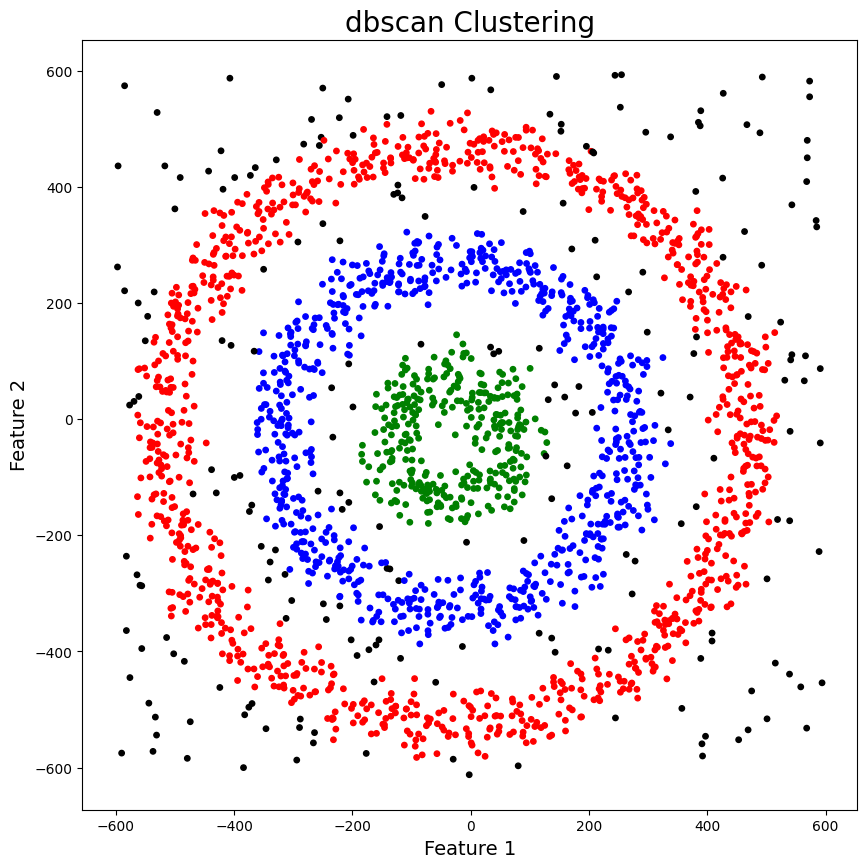

In [26]:
# Plotting resulting clusters
colors=['black', 'red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['dbscan_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('dbscan Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

dbscan is correctly able to identify the clusters and also the outliers

In [19]:
# you can also make predictions 

dbscan.fit_predict(df[[0, 1]])

array([ 0,  0,  0, ..., -1, -1, -1], dtype=int64)